#Lección 2: Modelos de regresión

Autor: Jorge Castro

Dentro del área del aprendizaje supervisado existen principalmente dos tipos de problemas: de **regresión** y de **clasificación**. En esta lección nos centraremos en los problemas de regresión y en la siguiente en los problemas de clasificación.

## Regresión lineal

Imaginemos que lideramos una pequeña empresa que vende autos usados y nos interesa desarrollar un modelo para estimar el valor de los vehículos. Para realizar esta tarea decidimos inicialmente usar datos históricos sobre los precios de otros vehículos previamente vendidos (en dólares) según el tamaño de su motor (en pulgadas cúbicas).

![](https://drive.google.com/uc?export=view&id=19RAWKgwydltTxaeqOXSm5Z-bzzWynODP)

In [1]:
import pandas as pd #biblioteca para lectura de datos estructurados y su manipulación
import numpy as np  #biblioteca para realizar operaciones con vectores y matrices 
import matplotlib.pyplot as plt #biblioteca para visualización de datos

ds = pd.read_csv('../Datasets/car_dataset.csv',header=0)

#ds.shape #Forma del dataset
#ds.head() #Imprimir primeras cinco filas del dataset
#ds.info() #Imprimir información más detallada sobre el dataset

In [2]:
#Tamaño del motor en pulgadas cúbicas versus precio del auto en dólares
ds.plot.scatter('engine-size','price')

<AxesSubplot:xlabel='engine-size', ylabel='price'>

Supongamos que queremos poner a la venta un vehículo cuyo motor pesa 220 pulgadas cúbicas, ¿Cuál debería ser su precio de acuerdo al histórico de ventas?

![](https://drive.google.com/uc?export=view&id=1nkAfBOZkianCeSmvpu0lD0QVo1THxXL_)



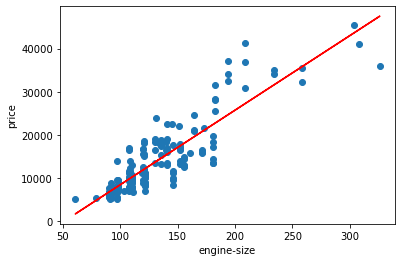

In [3]:
from sklearn.linear_model import LinearRegression #biblioteca de machine learning en Python

rl = LinearRegression()  # create a linear regression model (object)
x = ds[['engine-size']].values
y = ds[['price']].values

rl.fit(x,y)  # perform linear regression
Y_pred = rl.predict(x)  # make predictions


plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.xlabel('engine-size')
plt.ylabel('price')

#Imprimir valor a predecir
#pred = rl.predict(np.array([[220]]))
#plt.plot(220,pred,color='green',marker='x',markersize=10, mew=2)
#print(pred[0][0])

plt.show()

In [4]:
#Parámetros de la linea (y = mx + b)
print('Parámetros de la línea:',rl.coef_,rl.intercept_)

print('Precio del motor de 220 pulgadas cúbicas:', rl.coef_[0][0]*220 + rl.intercept_[0])

Parámetros de la línea: [[172.86186017]] [-8862.78797073]
Precio del motor de 220 pulgadas cúbicas: 29166.8212672687


¿Qué problema se observa en las predicciones hechas por el modelo de regresión lineal a partir del tamaño del motor?

![](https://drive.google.com/uc?export=view&id=1UtOKM0jb8-JZiwgGDQCCqoG-MNzNBFhY)


**QUIZZ PROBLEMAS REGRESIÓN LINEAL #1**


## Medición del desempeño de un modelo de regresión

El desempeño de un modelo de regresión puede medirse usando el coeficiente de determinación, denotado como $R^2$, el cual indica cuanta variación en la variable de respuesta puede ser explicada por la dependencia respecto a los predictores según el modelo particular de regresión. De esta forma, entre más grande sea $R^2$ mejor es el ajuste del modelo a los datos y por lo tanto mejor es la capacidad del modelo de explicar la variación de la salida en función de los predictores. El rango de valores de $R^2$ va de cero a uno. Matemáticamente $R^2$ se define como:

$R^2=1-\frac{SS_\text{Reg}}{SS_\text{Total}}=1-\frac{\sum_{i}{(y_i-\hat{y}_i)^2}}{\sum_{i}{(y_i-\bar{y})^2}}$

donde $y_i$ es el iésimo valor de la variable de respuesta $y$, $\hat{y}_i$ es su valor estimado según el modelo de regresión y  $\bar{y}$ es el valor promedio de $y$.

In [5]:
#Medición del desempeño de la regresión

#R2 usando RL y el tamaño del motor
rScore = rl.score(x, y)
print('Coeficiente de determinación:', rScore)

Coeficiente de determinación: 0.7899272137265414


## Opción #1: Aumentar la complejidad del modelo

Coeficiente de determinación: 0.7930740643803553


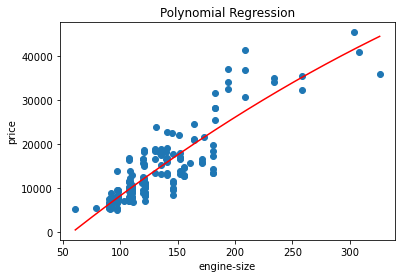

In [6]:
#Regresión polinomial
from sklearn.preprocessing import PolynomialFeatures

#Transformación de la entrada al grado del polinomio de interés
grado = 2 #3
x_pol = PolynomialFeatures(degree=grado, include_bias=False).fit_transform(x)
#print(x_pol) #nueva entrada

#Ajuste de la regresión polinomial
rpol = LinearRegression().fit(x_pol, y)

#Impresion en pantalla del modelo
plt.scatter(x, y)
x_seq = np.linspace(x.min(),x.max(),x.size).reshape(-1,1)
y_curve = rpol.predict(PolynomialFeatures(degree=grado, include_bias=False).fit_transform(x_seq))
plt.plot(x_seq, y_curve, color='red')
plt.title('Polynomial Regression')
plt.xlabel('engine-size')
plt.ylabel('price')

#Desempeño de la regresión polinomial
rScore = rpol.score(x_pol, y)
print('Coeficiente de determinación:', rScore)

## Opción #2: Aumentar la cantidad de variables independientes

En el contexto de aprendizaje automático las variables independientes son llamadas **entradas**, **características** (features) o **predictores**. Asimismo, las variables dependientes son llamadas **salidas** o **variables de respuesta** (responses). 

Cuando aplicamos una regresión usando dos o más entradas para predecir la variable de respuesta hablamos de una **regresión multivariada**. Por ejemplo, podríamos usar la información del peso total del vehículo y el tamaño del motor para predecir su precio.



In [7]:
#Segunda Opción: aumentar la cantidad de variables independientes (features)

#Regresión multivariada lineal
rl2 = LinearRegression()  # create a linear regression model (object)
x2 = ds[['curb-weight','engine-size']].values
y2 = ds[['price']].values

rl2.fit(x2,y2)  # perform linear regression

#R2 usando RL y dos variables
rScore2 = rl2.score(x2, y2)
print('Coeficiente de determinación:', rScore2)

# Imprimir valor a predecir

test_value=np.array([[500,220]])
pred=rl2.predict(test_value)
print('Price prediction: ${}'.format(pred[0][0]))

#print(ds.columns)

Coeficiente de determinación: 0.8103051024971152
Price prediction: $16145.219411448845


![](https://drive.google.com/uc?export=view&id=1SNoCCl6IlEj_eUvDExmRF7ORKMZ3D4Wk)


In [8]:
#R2 usando RL y tres variables numéricas
x3 = ds[['curb-weight','engine-size','horsepower']].values
rl3 = LinearRegression()  # create a linear regression model (object)
rl3.fit(x3,y2)  # perform linear regression
rScore3 = rl3.score(x3, y2)
print('Coeficiente de determinación:', rScore3)

# Imprimir valor a predecir
test_value=np.array([[100,500,220]])
pred=rl3.predict(test_value)
print('Price prediction: ${}'.format(pred[0][0]))

Coeficiente de determinación: 0.8194956061511467
Price prediction: $45886.70781808762


## ¿Cómo incorporar variables categóricas al modelo de regresión?

In [9]:
#Ejemplo usando una variable categórica

# print(ds[['num-of-cylinders']])
x_cat = pd.get_dummies(ds[['num-of-cylinders']])
x_cat.head()

#Concatenar variables categóricas y numéricas
x4 = pd.concat([x_cat.reset_index(drop=True), ds[['curb-weight','engine-size','horsepower']]], axis=1)
x4 = x4.values
x4.shape

y4=ds[['price']].values

#Ajuste del modelo de regresión
rl4 = LinearRegression()  # create a linear regression model (object)
rl4.fit(x4,y4)  # perform linear regression

#Valor R2
rScore4 = rl4.score(x4, y4)
print('Coeficiente de determinación:', rScore4)

# Imprimir valor a predecir
test_value=np.array([[0,0,0,0,0,0,100,500,220]])
pred=rl4.predict(test_value)
print('Price prediction: ${}'.format(pred[0][0]))

# #Verificar cuales variables son categóricas
# #ds.dtypes3
# ds.info()

Coeficiente de determinación: 0.8473956617892356
Price prediction: $38438.93115216994


In [10]:
# Ejemplo usando una variable categórica

x_cat=pd.get_dummies(ds[['num-of-cylinders','engine-type']])
x_num=ds[['curb-weight','engine-size','horsepower','peak-rpm']]

# Crea el arreglo de entrenamiento
x5=pd.concat([x_cat.reset_index(drop=True),x_num],axis=1)
x5=x5.values
y5=y4

# Ajuste del modelo de regresión
rl5=LinearRegression()
rl5.fit(x5,y5)

# Valor R2
rScore5=rl5.score(x5,y5)
print('R^2:',rScore5)

R^2: 0.8943483081505778


## Notas finales sobre los modelos de regresión

1. Es importante destacar que en un problema de regresión las entradas pueden ser continuas, discretas o categóricas pero la variable de respuesta es continua.
2. Los coeficientes de la regresión lineal se obtienen a través del método de mínimos cuadrados que minimiza la suma de residuales cuadrados (SSR). 
![](https://drive.google.com/uc?export=view&id=1S4RAc4lcnxAk6mIyTKsNZAxyXxl3nsGd)
3. El $R^2$ es una de las principales métricas para medir el desempeño de una regresión pues explica que tanta variabilidad en la variable de respuesta puede ser explicada por el modelo. Sin embargo, es importante resaltar que existen muchas métricas más para medir el desempeño de un modelo de regresión como el error cuadrático medio (MSE) y el  error absoluto medio (MAE).
4. La escogencia del grado óptimo de la función de regresión polinomial no es trivial y dependerá de cada caso, sin embargo es importante tener en cuenta dos problemas que pueden surgir a raíz de esta decisión: el **subajuste o error de sesgo (underfitting)** y el **sobreajuste o error de varianza (overfitting)**. El subajuste ocurre cuando un modelo no es capaz de capturar correctamente el patrón que siguen los datos de entrenamiento usualmente debido a su simplicidad o falta de entrenamiento. El sobreajuste ocurre cuando el modelo se ajusta demasiado bien a los datos de entrenamiento pero su desempeño es significativamente menor cuando se aplica a nuevos datos. Más adelante veremos algunas técnicas para tratar de reducir ambos problemas.
![](https://drive.google.com/uc?export=view&id=1ScfODq4okGdzSp-ByIcQPDuijgDeH2ok)
5. La meta de un modelo de regresión puede ser la **predicción** de la respuesta a partir de un conjunto de variables de entrada o bien la **cuantificación** de la fuerza y tipo de relación entre la respuesta y las variables de entrada.


**QUIZ PROBLEMA REG LINEAL 2**

Si se tiene el siguiente modelo de regresión lineal para predecir $y$ en función de $x_1$:

![](https://drive.google.com/uc?export=view&id=1uRjDqrEqjASWp1rUYo079bMgUZCnaLX5)

Cuál sería la forma más simple y económica de mejorar el desempeño del modelo:

- Recolectar datos sobre variables independientes adicionales ($x_2,x_3,...$) para incorporarlas al modelo
- Recolectar observaciones adicionales de $x_1$ y reentrenar el modelo
- Aumentar la complejidad del modelo de regresión
- La 2 y la 3


El problema que afronta el modelo anterior es un problema de:

- Sobreajuste
- Subajuste
- La 1 y la 2
- Ninguna de las anteriores

##Práctica para la casa #1
Usando el dataset *obesity_train.csv* y guiándose con la descripción de sus variables en el archivo *obesity_description.txt*:
- 1 Obtenga un modelo de regresión que estime el peso de una persona a partir de su altura y edad. Luego, imprima en pantalla la métrica $R^2$ para medir el desempeño del modelo.
- 2 Obtenga un nuevo modelo que estime el peso de una persona a partir de las 2 variables anteriores y al menos una variable **categórica** más. Luego, imprima en pantalla la métrica R2 para medir el desempeño del modelo.
- 3 Opcional: intente obtener el modelo de regresión con el máximo valor de $R^2$ usando cualquier número de variables y aumentando el grado del polinomio para predecir el peso de una persona.

In [11]:
#Puede realizar su práctica aquí
df=pd.read_csv('../Datasets/obesity_train.csv')
df.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0  Female  20.254534  1.569480   41.324558                             no   
1    Male  36.542885  1.750000  119.434645                            yes   
2  Female  26.000000  1.624134  111.531208                            yes   
3    Male  22.200779  1.769328  105.000576                            yes   
4    Male  17.120699  1.809251   58.968994                            yes   

  FAVC      FCVC  NCP        CAEC SMOKE      CH2O SCC       FAF       TUE  \
0  yes  2.392665  1.0  Frequently    no  1.000000  no  0.000000  0.738269   
1  yes  2.729890  3.0   Sometimes    no  2.030084  no  0.592607  0.754417   
2  yes  3.000000  3.0   Sometimes    no  2.609188  no  0.000000  0.174030   
3  yes  2.685484  3.0   Sometimes    no  2.649459  no  1.000000  0.000000   
4  yes  2.524428  4.0   Sometimes    no  2.000000  no  2.000000  0.038380   

        CALC                 MTRANS           NObeyesdad  
0  Sometimes  Public_Transportation  Insufficient_Weight  
1  Sometimes             Automobile      Obesity_Type_II  
2  Sometimes  Public_Transportation     Obesity_Type_III  
3  Sometimes  Public_Transportation       Obesity_Type_I  
4         no             Automobile  Insufficient_Weight

In [12]:
x=df[['Age','Height']].values
y=df[['Weight']]

In [13]:
rl=LinearRegression()
rl.fit(x,y)
rScore=rl.score(x,y)
print("R^2:",rScore)

R^2: 0.25582809406905216


In [14]:
x=pd.concat([pd.get_dummies(df[['CALC','FAVC','CAEC','family_history_with_overweight','SCC']]).reset_index(drop=True),df[['Age','Height','CH2O','FAF']]],axis=1).values

In [15]:
x_pol=PolynomialFeatures(degree=5, include_bias=False).fit_transform(x)
rl=LinearRegression()
rl.fit(x_pol,y)
rScore=rl.score(x_pol,y)
print("R^2:",rScore)

R^2: 0.8293625175565447


In [16]:
# Máquina de soporte vectorial
from sklearn import svm

# Aplanamiento de datos
Y_reshaped=np.ravel(y)

# Crear el regresor
svmReg=svm.SVR(degree=5,C=40000) # C es inversamente proporcional al grado de regularización
svmReg.fit(x,Y_reshaped)

# Valor R2
rScore=svmReg.score(x,Y_reshaped)
print('R^2 SVM as reg:', rScore)

R^2 SVM as reg: 0.5851388461658081


In [17]:
# kNN para regresión
from sklearn.neighbors import KNeighborsRegressor

# cantidad de vecinos
n_neighbors=5

# ajuste del modelo kNNs
neighReg=KNeighborsRegressor(n_neighbors=n_neighbors)
neighReg.fit(x,Y_reshaped)

# Puntaje kNN
rScore=neighReg.score(x,Y_reshaped)
print('R^2:', rScore)

R^2: 0.7840884541242311


Existen otros modelos de regresión más complejos como:
1. Máquinas de soporte vectorial (SVM)
2. Árboles de decisión
3. Bosques aleatorios (Random Forest)
4. Redes Neuronales profundas (DNN)